In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.stem import PorterStemmer

In [15]:

df = pd.read_csv(r"C:\\Users\\Windows 11\\Machine Learning Projects\\SMS Spam Classifier\\spam.csv", encoding='latin1')

In [19]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4519,ham,What to think no one saying clearly. Ok leave ...,NaN,NaN,NaN
3085,ham,I wish that I was with you. Holding you tightl...,NaN,NaN,NaN
4004,ham,", ow u dey.i paid 60,400thousad.i told u woul...",NaN,NaN,NaN
2675,ham,I'm sick !! I'm needy !! I want you !! *pouts*...,NaN,NaN,NaN
3759,ham,We'll join the &lt;#&gt; bus,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [25]:
#Steps to be included in this Project
# 1. Data Cleaning
# 2. EDA
# 3. Text PreProcessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1.Data Cleaning

In [30]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [34]:
#Dropping Last # Coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [38]:
# Renaming Coloumns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [51]:
df['Target']=encoder.fit_transform(df['Target'])

In [59]:
#Checking MIssing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [61]:
#Checking Duplicate Values
df.duplicated().sum()

403

In [69]:
#Removing Duplicate Values
df=df.drop_duplicates(keep='first')

In [75]:
df.shape

(5169, 2)

# 2.EDA

In [78]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

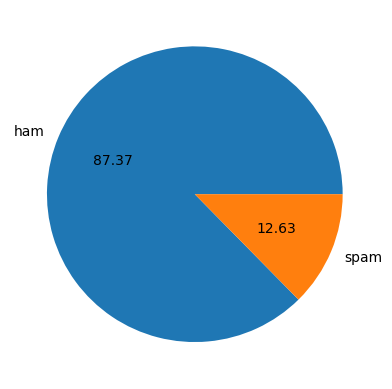

In [82]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show

In [86]:
# Data is Imbalanced

In [97]:
import nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
df['num_characters']=df['Text'].apply(len)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14812\911280584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [125]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [166]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14812\3731514747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [170]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [173]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [177]:
#for ham msgs
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [179]:
#for spam msgs
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [181]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

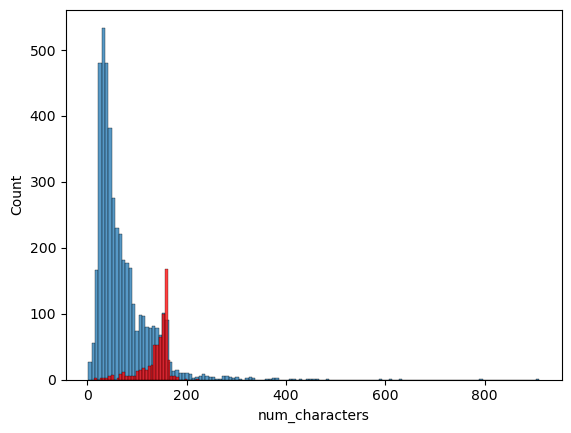

In [185]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')


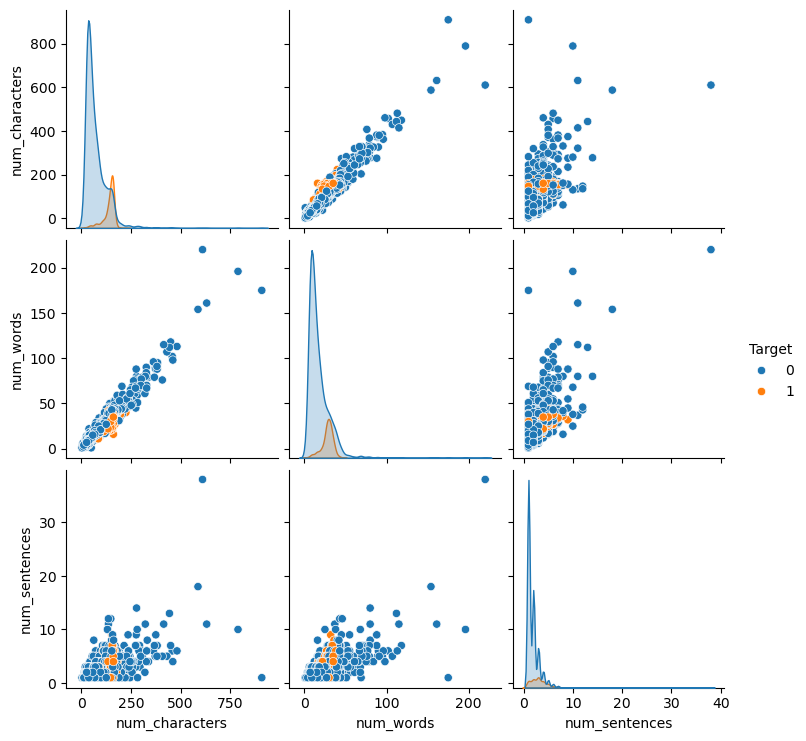

In [187]:
sns.pairplot(df,hue='Target')

# 3.Data Preprocessing
##### Lower Case
##### Tokenization
##### Removing Special Characters
##### Removing Stop Words and Punctuation
##### Stemming



In [279]:
def transform_text(text):
    ps = PorterStemmer()
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [281]:
transform_text('i loved the yt lectures on machine learning?')

'love yt lectur machin learn'

In [285]:
df['transformed_text']=df['Text'].apply(transform_text)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14812\3574485815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Text'].apply(transform_text)


In [287]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [309]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [313]:
spam_wc=wc.generate(df[df['Target']== 1]['transformed_text'].str.cat(sep=" "))

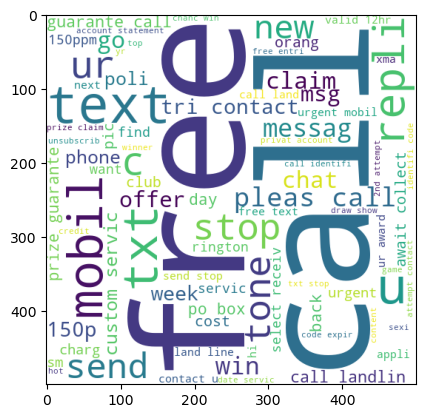

In [315]:
plt.imshow(spam_wc)


In [319]:
ham_wc=wc.generate(df[df['Target']== 0]['transformed_text'].str.cat(sep=" "))

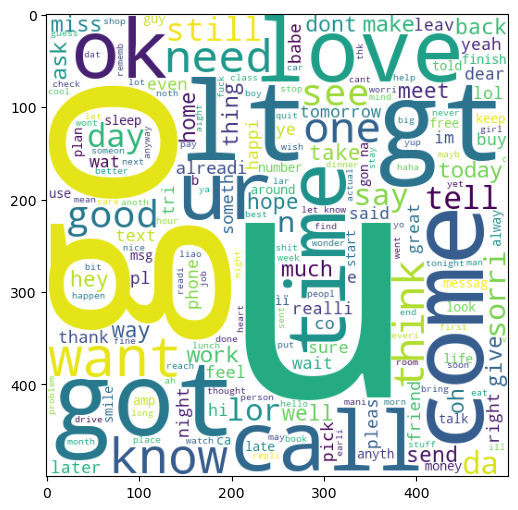

In [323]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [325]:
#Top 30 words in spam
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

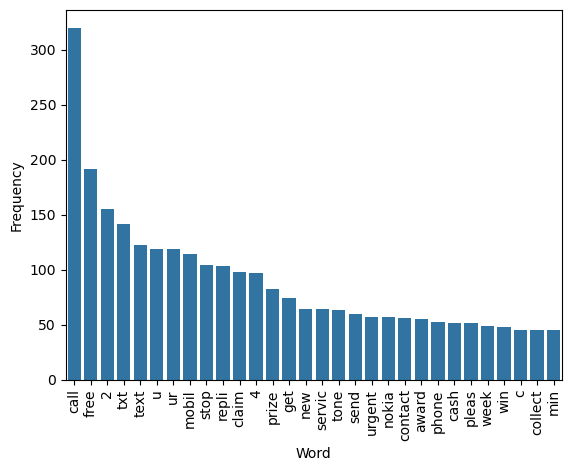

In [348]:
from collections import Counter

# Create a DataFrame from the Counter
common_wordsspam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the DataFrame columns as keyword arguments
sns.barplot(x='Word', y='Frequency', data=common_wordsspam)

plt.xticks(rotation='vertical')
plt.show()


In [346]:
# Top 30 Words of Ham
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

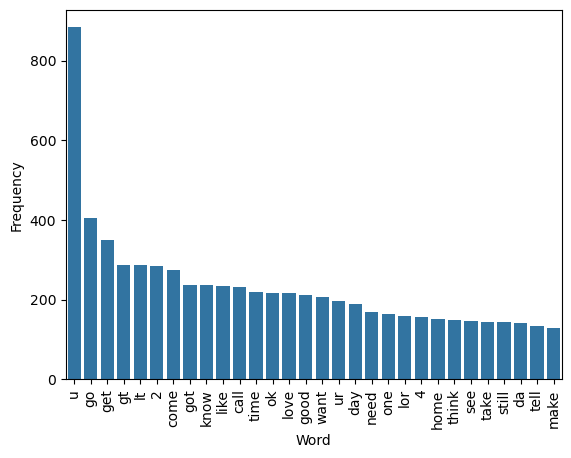

In [350]:
# Create a DataFrame from the Counter
common_wordsham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the DataFrame columns as keyword arguments
sns.barplot(x='Word', y='Frequency', data=common_wordsham)

plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building( Naive BAyes)

In [384]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [386]:
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [388]:
X.shape

(5169, 6708)

In [390]:
y=df['Target'].values

In [392]:
from sklearn.model_selection import train_test_split

In [394]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [396]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [398]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [400]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [401]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [404]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# Checking other Algorithms

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [427]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [431]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb,  
}

In [441]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)


In [466]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Assuming clfs is a dictionary of classifiers
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create a DataFrame
results_df = pd.DataFrame({
    'Classifier': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})



For SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For KN
Accuracy - 0.9003868471953579
Precision - 1.0
For NB
Accuracy - 0.9593810444874274
Precision - 1.0
For DT
Accuracy - 0.9352030947775629
Precision - 0.8380952380952381
For LR
Accuracy - 0.9516441005802708
Precision - 0.94
For RF
Accuracy - 0.971953578336557
Precision - 1.0


C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For xgb
Accuracy - 0.9729206963249516
Precision - 0.9435483870967742
   Classifier  Accuracy  Precision
1          KN  0.900387   1.000000
2          NB  0.959381   1.000000
5          RF  0.971954   1.000000
8         ETC  0.972921   0.982456
0         SVC  0.972921   0.974138
6    AdaBoost  0.961315   0.945455
10        xgb  0.972921   0.943548
4          LR  0.951644   0.940000
9        GBDT  0.952611   0.923810
7         BgC  0.958414   0.862595
3          DT  0.935203   0.838095


In [467]:
# Sort the DataFrame by Precision in descending order
results_df = results_df.sort_values(by='Precision', ascending=False)

# Display the sorted DataFrame
print(results_df)

   Classifier  Accuracy  Precision
1          KN  0.900387   1.000000
2          NB  0.959381   1.000000
5          RF  0.971954   1.000000
8         ETC  0.972921   0.982456
0         SVC  0.972921   0.974138
6    AdaBoost  0.961315   0.945455
10        xgb  0.972921   0.943548
4          LR  0.951644   0.940000
9        GBDT  0.952611   0.923810
7         BgC  0.958414   0.862595
3          DT  0.935203   0.838095
